In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
# Read Dataset
data_churn=pd.read_csv("customer_churn.csv")
data_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data_churn['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

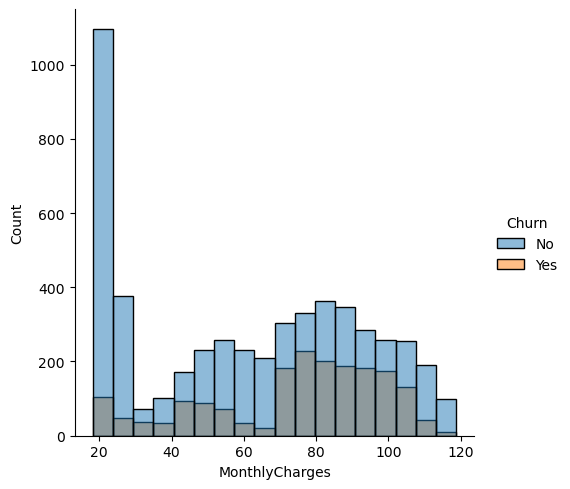

In [4]:
sns.displot(x=data_churn["MonthlyCharges"],hue=data_churn['Churn'])

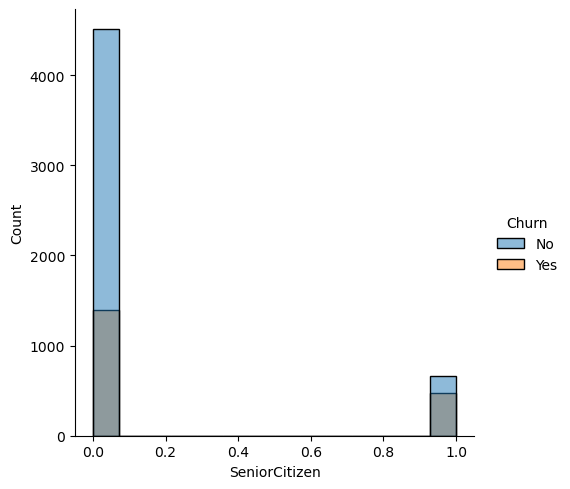

In [5]:
sns.displot(x=data_churn["SeniorCitizen"],hue=data_churn['Churn'])

In [6]:
obj_cols=data_churn.select_dtypes("object").columns
obj_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [7]:
# Perform encoding for object columns for model building
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoded_val=encoder.fit_transform(data_churn[obj_cols])
encoded_val_df=pd.DataFrame(encoded_val,columns=encoder.get_feature_names_out(obj_cols),index=data_churn.index)
df_encoded_final=pd.concat([data_churn.drop(obj_cols,axis=1),encoded_val_df],axis=1)
df_encoded_final

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,1,29.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,34,56.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,45,42.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,2,70.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7039,0,72,103.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7040,0,11,29.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,4,74.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# check for null values in final encoded df
df_encoded_final.isnull().sum().sum()

0

In [10]:
# Split df into features and target
X=df_encoded_final.drop("Churn_Yes",axis=1)
y=df_encoded_final['Churn_Yes']

In [11]:
# Check for class imbalance in target
df_encoded_final['Churn_Yes'].value_counts()

Churn_Yes
0.0    5174
1.0    1869
Name: count, dtype: int64

In [12]:
# Perform oversampling to overcome class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({0.0: 5174, 1.0: 5174})


In [13]:
# Perform train test split for model building and evaluation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [14]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No
4541,1,1,50.550000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5709,0,12,19.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7393,0,7,75.729938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10026,1,2,70.472750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3578,0,40,65.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,72,89.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5191,0,23,91.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5390,1,12,99.450000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0,26,19.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
y_train

4541     1.0
5709     0.0
7393     1.0
10026    1.0
3578     0.0
        ... 
5734     0.0
5191     0.0
5390     1.0
860      0.0
7270     1.0
Name: Churn_Yes, Length: 8278, dtype: float64

In [16]:
X_test

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No
9428,1,46,95.074929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4593,0,11,20.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5379,0,56,98.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8918,0,8,74.897234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6448,0,58,104.650000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6425,0,52,44.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
766,0,22,78.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1144,0,1,35.550000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3065,0,1,45.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
y_test

9428    1.0
4593    0.0
5379    0.0
8918    1.0
6448    1.0
       ... 
6425    0.0
766     0.0
1144    1.0
3065    0.0
7073    1.0
Name: Churn_Yes, Length: 2070, dtype: float64

In [18]:
# Scale the df for better generalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [20]:
X_train_scaled.shape

(8278, 13619)

In [22]:
X_test_scaled.shape

(2070, 13619)

In [23]:
# Train RandomForestClassifier on df
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred=clf.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [27]:
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

Accuracy:0.9855072463768116


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1021
         1.0       1.00      0.97      0.99      1049

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070



In [30]:
print(f"ROC_AUC_Score:{roc_auc_score(y_test,y_pred)}")

ROC_AUC_Score:0.9857006673021926


In [31]:
print(confusion_matrix(y_test,y_pred))

[[1021    0]
 [  30 1019]]
